1. Business understading:
- Finding the red news of USD / EUR  and GBP
- Viz key metrics (belong to red news)
- What news can be vizualiztion?

In [1]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("/Users/datpro/Documents/gitdatpro/ff-transform-data/data/silver/final_transformed_data.csv")
# Focus on red news and top currencies USD/EUR and GBP
filtered_data = df[(df['impact'] == 'red') & (df['currency'].isin(['USD', 'EUR', 'GBP']))]

print(df.head(3))
print(filtered_df.head(3))

              datetime currency impact         event  actual  forecast  \
0  2024-01-01 00:00:00      NZD   gray  Bank Holiday     NaN       NaN   
1  2024-01-01 00:00:00      AUD   gray  Bank Holiday     NaN       NaN   
2  2024-01-01 00:00:00      JPY   gray  Bank Holiday     NaN       NaN   

   previous category_lv1  category_lv2 category_lv3                 date  \
0       NaN      holiday  bank holiday  unspecified  2024-01-01 00:00:00   
1       NaN      holiday  bank holiday  unspecified  2024-01-01 00:00:00   
2       NaN      holiday  bank holiday  unspecified  2024-01-01 00:00:00   

       time  
0  00:00:00  
1  00:00:00  
2  00:00:00  
              datetime currency impact                  event     actual  \
0  2024-01-03 22:00:00      USD    red  ISM Manufacturing PMI       47.4   
1  2024-01-03 22:00:00      USD    red     JOLTS Job Openings  8790000.0   
2  2024-01-04 02:00:00      USD    red   FOMC Meeting Minutes        NaN   

    forecast   previous           cat

In [7]:
filtered_df.category_lv1.unique()

array(['production indicators', 'employment indicators',
       'monetary policy', 'inflation', 'other', 'speak', 'gdp',
       'economic indicators', 'sales indicators', 'submit', 'bond',
       'political events'], dtype=object)

In [8]:
filtered_df.category_lv2.unique()

array(['manufacturing pmi', 'job openings', 'meeting minutes',
       'prelim cpi', 'employment change', 'unemployment claims',
       'employment indicators', 'unemployment rate', 'services pmi',
       'central bank speak', 'general cpi', 'gdp general', 'general ppi',
       'manufacturing index', 'retail sales', 'consumer sentiment',
       'rate decision', 'policy statement/report', 'advance gdp',
       'press conference', 'core pce', 'consumer confidence',
       'employment cost index', 'policy statement',
       'government official speak', 'prelim gdp', 'budget release',
       'bond auction', 'economic projections', 'summit', 'final gdp',
       'pending home sales', 'flash cpi', 'parliamentary elections',
       'treasury report', 'new home sales'], dtype=object)

In [20]:
filtered_df[(filtered_df['category_lv1'] == 'gdp') 
             # & (filtered_df['category_lv2'] == 'final gdp')
             #  & (filtered_df['category_lv3'] == 'm/m')
              & (filtered_df['currency'] == 'USD')
            ]               

,datetime,currency,impact,event,actual,forecast,previous,category_lv1,category_lv2,category_lv3,date,time
297,2024-01-25 20:30:00,USD,red,Advance GDP q/q,0.033,0.020,0.049,gdp,advance gdp,q/q,2024-01-25 00:00:00,20:30:00
725,2024-02-28 20:30:00,USD,red,Prelim GDP q/q,0.032,0.033,0.033,gdp,prelim gdp,q/q,2024-02-28 00:00:00,20:30:00
1129,2024-03-28 19:30:00,USD,red,Final GDP q/q,0.034,0.032,0.032,gdp,final gdp,q/q,2024-03-28 00:00:00,19:30:00
1515,2024-04-25 19:30:00,USD,red,Advance GDP q/q,0.016,0.025,0.034,gdp,advance gdp,q/q,2024-04-25 00:00:00,19:30:00
1987,2024-05-30 19:30:00,USD,red,Prelim GDP q/q,0.013,0.012,0.016,gdp,prelim gdp,q/q,2024-05-30 00:00:00,19:30:00
2354,2024-06-27 19:30:00,USD,red,Final GDP q/q,0.014,0.014,0.013,gdp,final gdp,q/q,2024-06-27 00:00:00,19:30:00
2706,2024-07-25 19:30:00,USD,red,Advance GDP q/q,0.028,0.020,0.014,gdp,advance gdp,q/q,2024-07-25 00:00:00,19:30:00


In [25]:
# Reset index cho DataFrame filtered_df
filtered_df = filtered_df.reset_index(drop=True)

filtered_df

,datetime,currency,impact,event,actual,forecast,previous,category_lv1,category_lv2,category_lv3,date,time
0,2024-01-03 22:00:00,USD,red,ISM Manufacturing PMI,47.400,47.200,46.700,production indicators,manufacturing pmi,unspecified,2024-01-03 00:00:00,22:00:00
1,2024-01-03 22:00:00,USD,red,JOLTS Job Openings,8790000.000,8840000.000,8850000.000,employment indicators,job openings,unspecified,2024-01-03 00:00:00,22:00:00
2,2024-01-04 02:00:00,USD,red,FOMC Meeting Minutes,NaN,NaN,NaN,monetary policy,meeting minutes,unspecified,2024-01-04 00:00:00,02:00:00
3,2024-01-04 00:00:00,EUR,red,German Prelim CPI m/m,0.001,0.002,-0.004,inflation,prelim cpi,m/m,2024-01-04 00:00:00,00:00:00
4,2024-01-04 20:15:00,USD,red,ADP Non-Farm Employment Change,164000.000,120000.000,101000.000,employment indicators,employment change,unspecified,2024-01-04 00:00:00,20:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024-07-31 16:00:00,EUR,red,Core CPI Flash Estimate y/y,0.029,0.028,0.029,inflation,flash cpi,y/y,2024-07-31 00:00:00,16:00:00
358,2024-07-31 16:00:00,EUR,red,CPI Flash Estimate y/y,0.026,0.025,0.025,inflation,flash cpi,y/y,2024-07-31 00:00:00,16:00:00
359,2024-07-31 19:15:00,USD,red,ADP Non-Farm Employment Change,122000.000,147000.000,155000.000,employment indicators,employment change,unspecified,2024-07-31 00:00:00,19:15:00
360,2024-07-31 19:30:00,USD,red,Employment Cost Index q/q,0.009,0.010,0.012,employment indicators,employment cost index,q/q,2024-07-31 00:00:00,19:30:00


In [33]:
filtered_df[(filtered_df['currency'] == 'EUR')]

,datetime,currency,impact,event,actual,forecast,previous,category_lv1,category_lv2,category_lv3,date,time
3,2024-01-04 00:00:00,EUR,red,German Prelim CPI m/m,0.001,0.002,-0.004,inflation,prelim cpi,m/m,2024-01-04 00:00:00,00:00:00
27,2024-01-24 15:15:00,EUR,red,French Flash Manufacturing PMI,43.200,42.500,42.100,production indicators,manufacturing pmi,unspecified,2024-01-24 00:00:00,15:15:00
28,2024-01-24 15:15:00,EUR,red,French Flash Services PMI,45.000,46.100,45.700,production indicators,services pmi,unspecified,2024-01-24 00:00:00,15:15:00
29,2024-01-24 15:30:00,EUR,red,German Flash Manufacturing PMI,45.400,43.700,43.300,production indicators,manufacturing pmi,unspecified,2024-01-24 00:00:00,15:30:00
30,2024-01-24 15:30:00,EUR,red,German Flash Services PMI,47.600,49.300,49.300,production indicators,services pmi,unspecified,2024-01-24 00:00:00,15:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...
345,2024-07-24 14:30:00,EUR,red,German Flash Manufacturing PMI,42.600,44.100,43.500,production indicators,manufacturing pmi,unspecified,2024-07-24 00:00:00,14:30:00
346,2024-07-24 14:30:00,EUR,red,German Flash Services PMI,52.000,53.200,53.100,production indicators,services pmi,unspecified,2024-07-24 00:00:00,14:30:00
354,2024-07-30 00:00:00,EUR,red,German Prelim CPI m/m,0.003,0.003,0.001,inflation,prelim cpi,m/m,2024-07-30 00:00:00,00:00:00
357,2024-07-31 16:00:00,EUR,red,Core CPI Flash Estimate y/y,0.029,0.028,0.029,inflation,flash cpi,y/y,2024-07-31 00:00:00,16:00:00


/var/folders/6q/33ssnk0j73sg90b2sbyf6_740000gn/T/ipykernel_61740/3883305725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['datetime'] = pd.to_datetime(filtered_data['datetime'])


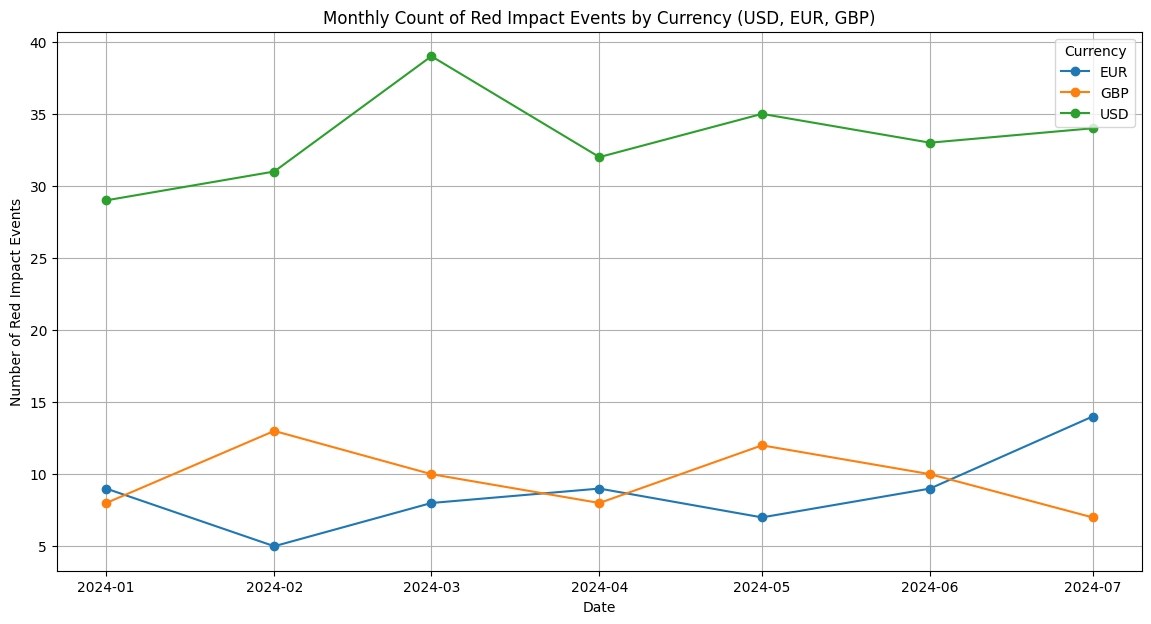

In [36]:
import matplotlib.pyplot as plt

# Convert the 'datetime' column to pandas datetime
filtered_data['datetime'] = pd.to_datetime(filtered_data['datetime'])

# Group data by month and currency to analyze the frequency of red impact events over time
time_series_data = filtered_data.groupby([filtered_data['datetime'].dt.to_period('M'), 'currency']).size().unstack(fill_value=0)

# Plot the time series of red impact events for each currency
plt.figure(figsize=(14, 7))
for currency in time_series_data.columns:
    plt.plot(time_series_data.index.to_timestamp(), time_series_data[currency], label=currency, marker='o')

plt.title('Monthly Count of Red Impact Events by Currency (USD, EUR, GBP)')
plt.xlabel('Date')
plt.ylabel('Number of Red Impact Events')
plt.legend(title='Currency')
plt.grid(True)
plt.show()


In [39]:
filtered_data.category_lv1.unique()

array(['production indicators', 'employment indicators',
       'monetary policy', 'inflation', 'other', 'speak', 'gdp',
       'economic indicators', 'sales indicators', 'submit', 'bond',
       'political events'], dtype=object)

In [53]:
df[(df['event'] == 'PPI m/m')
& (df['currency'] == 'EUR')

]

,datetime,currency,impact,event,actual,forecast,previous,category_lv1,category_lv2,category_lv3,date,time
66,2024-01-05 17:00:00,EUR,yellow,PPI m/m,-0.003,-0.001,0.003,inflation,general ppi,m/m,2024-01-05 00:00:00,17:00:00
440,2024-02-05 17:00:00,EUR,yellow,PPI m/m,-0.008,-0.008,-0.003,inflation,general ppi,m/m,2024-02-05 00:00:00,17:00:00
828,2024-03-05 17:00:00,EUR,yellow,PPI m/m,-0.009,-0.001,-0.009,inflation,general ppi,m/m,2024-03-05 00:00:00,17:00:00
1240,2024-04-04 16:00:00,EUR,yellow,PPI m/m,-0.010,-0.006,-0.009,inflation,general ppi,m/m,2024-04-04 00:00:00,16:00:00
1659,2024-05-06 16:00:00,EUR,yellow,PPI m/m,-0.004,-0.004,-0.011,inflation,general ppi,m/m,2024-05-06 00:00:00,16:00:00
2067,2024-06-05 16:00:00,EUR,yellow,PPI m/m,-0.010,-0.006,-0.005,inflation,general ppi,m/m,2024-06-05 00:00:00,16:00:00
2449,2024-07-03 16:00:00,EUR,yellow,PPI m/m,-0.002,-0.001,-0.010,inflation,general ppi,m/m,2024-07-03 00:00:00,16:00:00
